# Plotting the Heatmaps

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/work/magroup/nzh/Heimdall-dev/plotting/spatial.csv")  # Replace with actual file path if needed
df = df.dropna()
df.loc[df['F_Expression'] == 'nonzero_2nn', 'F_Expression'] = 'Continuous'
df.loc[df['F_Expression'] == 'scfoundation', 'F_Expression'] = 'Autobin'
df.loc[df['F_Expression'] == 'sorting', 'F_Expression'] = 'Sorting'
df.loc[df['F_Expression'] == 'binning', 'F_Expression'] = 'Binning'

df.loc[df['F_Gene'] == 'identity', 'F_Gene'] = 'Random'
df.loc[df['F_Gene'] == 'pca_esm2', 'F_Gene'] = 'ESM2'
df.loc[df['F_Gene'] == 'pca_gene2vec', 'F_Gene'] = 'Gene2Vec'
df.loc[df['F_Gene'] == 'pca_hyenadna', 'F_Gene'] = 'HyenaDNA'
df.loc[df['F_Gene'] == 'pca_genept', 'F_Gene'] = 'GenePT'


df.loc[df['Dataset'] == 'Spatial35', 'Dataset'] = 'Overlap35'
df.loc[df['Dataset'] == 'Spatial113', 'Dataset'] = 'Overlap113'


df = df[~df.isin(['dummy']).any(axis=1)]

# Aggregate mean and std across seeds
grouped = df.groupby(['F_Gene', 'F_Expression', 'Dataset', 'All_Genes']).agg(
    mean_value=('Test Score', 'mean'),
    std_value=('Test Score', 'std')
).reset_index()

# Fixed orders
gene_order = ["Random", "HyenaDNA", "ESM2", "GenePT", "Gene2Vec"]
expression_order = ["Sorting", "Binning", "Autobin", "Continuous"]

# Conditions to subset and plot
conditions = [
    ("Overlap35", True),
    ("Overlap35", False),
    ("Overlap113", True),
    ("Overlap113", False)
]

def plot_heatmap_final_pretty(data, title, save_path=None):
    if data.empty:
        print(f"Skipping {title} because no data.")
        return

    pivot_table = data.pivot(index="F_Gene", columns="F_Expression", values="mean_value")
    available_genes = [fg for fg in gene_order if fg in pivot_table.index]
    available_expressions = [fe for fe in expression_order if fe in pivot_table.columns]
    pivot_table = pivot_table.loc[available_genes, available_expressions]

    fig, ax = plt.subplots(figsize=(18, 14))

    heatmap = sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        cbar=True,
        linewidths=0.5,
        linecolor='white',
        annot_kws={"size": 30, "ha": "center", "va": "center"},  # removed weight='bold'
        cbar_kws={"shrink": 0.8, "aspect": 20},
        ax=ax
    )

    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)

    ax.set_title(title, fontsize=32, pad=20)  # removed weight='bold'
    ax.set_xlabel('$F_{Expression}$', fontsize=35, labelpad=20, fontweight='normal')
    ax.set_ylabel('$F_{Gene}$', fontsize=35, labelpad=20, fontweight='normal')
    ax.set_title(title, fontsize=32, pad=20, fontweight='normal')

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0)

    plt.tight_layout(pad=2.0)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")
    plt.close(fig)




# Generate plots
for dataset, all_genes in conditions:
    subset = grouped[(grouped['Dataset'] == dataset) & (grouped['All_Genes'] == all_genes)]

    if all_genes != True:
        title = f"{dataset} Only Expressed Genes"
    else:
        title = f"{dataset} With All Genes"
    plot_heatmap_final_pretty(subset, title, f"/work/magroup/ehaber/heimdall_plotting/{title}")


✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap35 With All Genes
✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap35 Only Expressed Genes
✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap113 With All Genes
✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap113 Only Expressed Genes


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/work/magroup/ehaber/heimdall_plotting/spatial_splits.csv")

# Find the index of the marker row
marker_idx = df.index[df['Status'] == 'RERUN WITH ZEROS'].tolist()
if marker_idx:
    split_idx = marker_idx[0]  # first occurrence
    df['All_Genes'] = False
    df.loc[split_idx:, 'All_Genes'] = True
else:
    print("Warning: No 'RERUN WITH ZEROS' marker found. Defaulting to All_Genes=False.")
    df['All_Genes'] = False





df = df.drop(['Test Score.1', 'Run Command', 'Create Sweep Command', 'Run/Sweep Command'], axis=1)
df = df.dropna()

# Map experiment names to dataset labels
name_to_dataset = {
    "spatial_cancer_split1": "Spatial35",
    "spatial_cancer_split2": "Spatial113",  # example mapping – adjust if needed
    # add more mappings here if you have more experiments
}

df["Dataset"] = df["Experiment Name"].map(name_to_dataset)

df.loc[df['F_Expression'] == 'nonzero_2nn', 'F_Expression'] = 'Continuous'
df.loc[df['F_Expression'] == 'scfoundation', 'F_Expression'] = 'Autobin'
df.loc[df['F_Expression'] == 'sorting', 'F_Expression'] = 'Sorting'
df.loc[df['F_Expression'] == 'binning', 'F_Expression'] = 'Binning'

df.loc[df['F_Gene'] == 'identity', 'F_Gene'] = 'Random'
df.loc[df['F_Gene'] == 'pca_esm2', 'F_Gene'] = 'ESM2'
df.loc[df['F_Gene'] == 'pca_gene2vec', 'F_Gene'] = 'Gene2Vec'
df.loc[df['F_Gene'] == 'pca_hyenadna', 'F_Gene'] = 'HyenaDNA'
df.loc[df['F_Gene'] == 'pca_genept', 'F_Gene'] = 'GenePT'


df.loc[df['Dataset'] == 'Spatial35', 'Dataset'] = 'Overlap35'
df.loc[df['Dataset'] == 'Spatial113', 'Dataset'] = 'Overlap113'


df = df[~df.isin(['dummy']).any(axis=1)]

# Aggregate mean and std across seeds
grouped = df.groupby(['F_Gene', 'F_Expression', 'Dataset', 'All_Genes']).agg(
    mean_value=('Test Score', 'mean'),
    std_value=('Test Score', 'std')
).reset_index()

# Fixed orders
gene_order = ["Random", "HyenaDNA", "ESM2", "GenePT", "Gene2Vec"]
expression_order = ["Sorting", "Binning", "Autobin", "Continuous"]

# Conditions to subset and plot
conditions = [
    ("Overlap35", True),
    ("Overlap35", False),
    ("Overlap113", True),
    ("Overlap113", False)
]

def plot_heatmap_final_pretty(data, title, save_path=None):
    if data.empty:
        print(f"Skipping {title} because no data.")
        return

    pivot_table = data.pivot(index="F_Gene", columns="F_Expression", values="mean_value")
    available_genes = [fg for fg in gene_order if fg in pivot_table.index]
    available_expressions = [fe for fe in expression_order if fe in pivot_table.columns]
    pivot_table = pivot_table.loc[available_genes, available_expressions]

    fig, ax = plt.subplots(figsize=(18, 14))

    heatmap = sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        cbar=True,
        linewidths=0.5,
        linecolor='white',
        annot_kws={"size": 30, "ha": "center", "va": "center"},  # removed weight='bold'
        cbar_kws={"shrink": 0.8, "aspect": 20},
        ax=ax
    )

    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)

    ax.set_title(title, fontsize=32, pad=20)  # removed weight='bold'
    ax.set_xlabel('$F_{Expression}$', fontsize=35, labelpad=20)
    ax.set_ylabel('$F_{Gene}$', fontsize=35, labelpad=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0)

    plt.tight_layout(pad=2.0)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")
    plt.close(fig)



# # Generate plots
# for dataset, all_genes in conditions:
#     subset = grouped[(grouped['Dataset'] == dataset) & (grouped['All_Genes'] == all_genes)]

#     if all_genes != True:
#         title = f"{dataset} Only Expressed Genes"
#     else:
#         title = f"{dataset} With All Genes"
#     plot_heatmap_final_pretty(subset, title)
for dataset, all_genes in conditions:
    subset = grouped[(grouped['Dataset'] == dataset) & (grouped['All_Genes'] == all_genes)]

    if all_genes:
        title = f"{dataset} With All Genes"
        filename = f"{dataset}_all_genes_heatmap.png"
    else:
        title = f"{dataset} Only Expressed Genes"
        filename = f"{dataset}_expressed_genes_heatmap.png"

    save_path = f"/work/magroup/ehaber/heimdall_plotting/{filename}"
    plot_heatmap_final_pretty(subset, title, save_path=save_path)


✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap35_all_genes_heatmap.png
✅ Saved: /work/magroup/ehaber/heimdall_plotting/Overlap35_expressed_genes_heatmap.png
Skipping Overlap113 With All Genes because no data.
Skipping Overlap113 Only Expressed Genes because no data.


# Tissue HEATMAPS

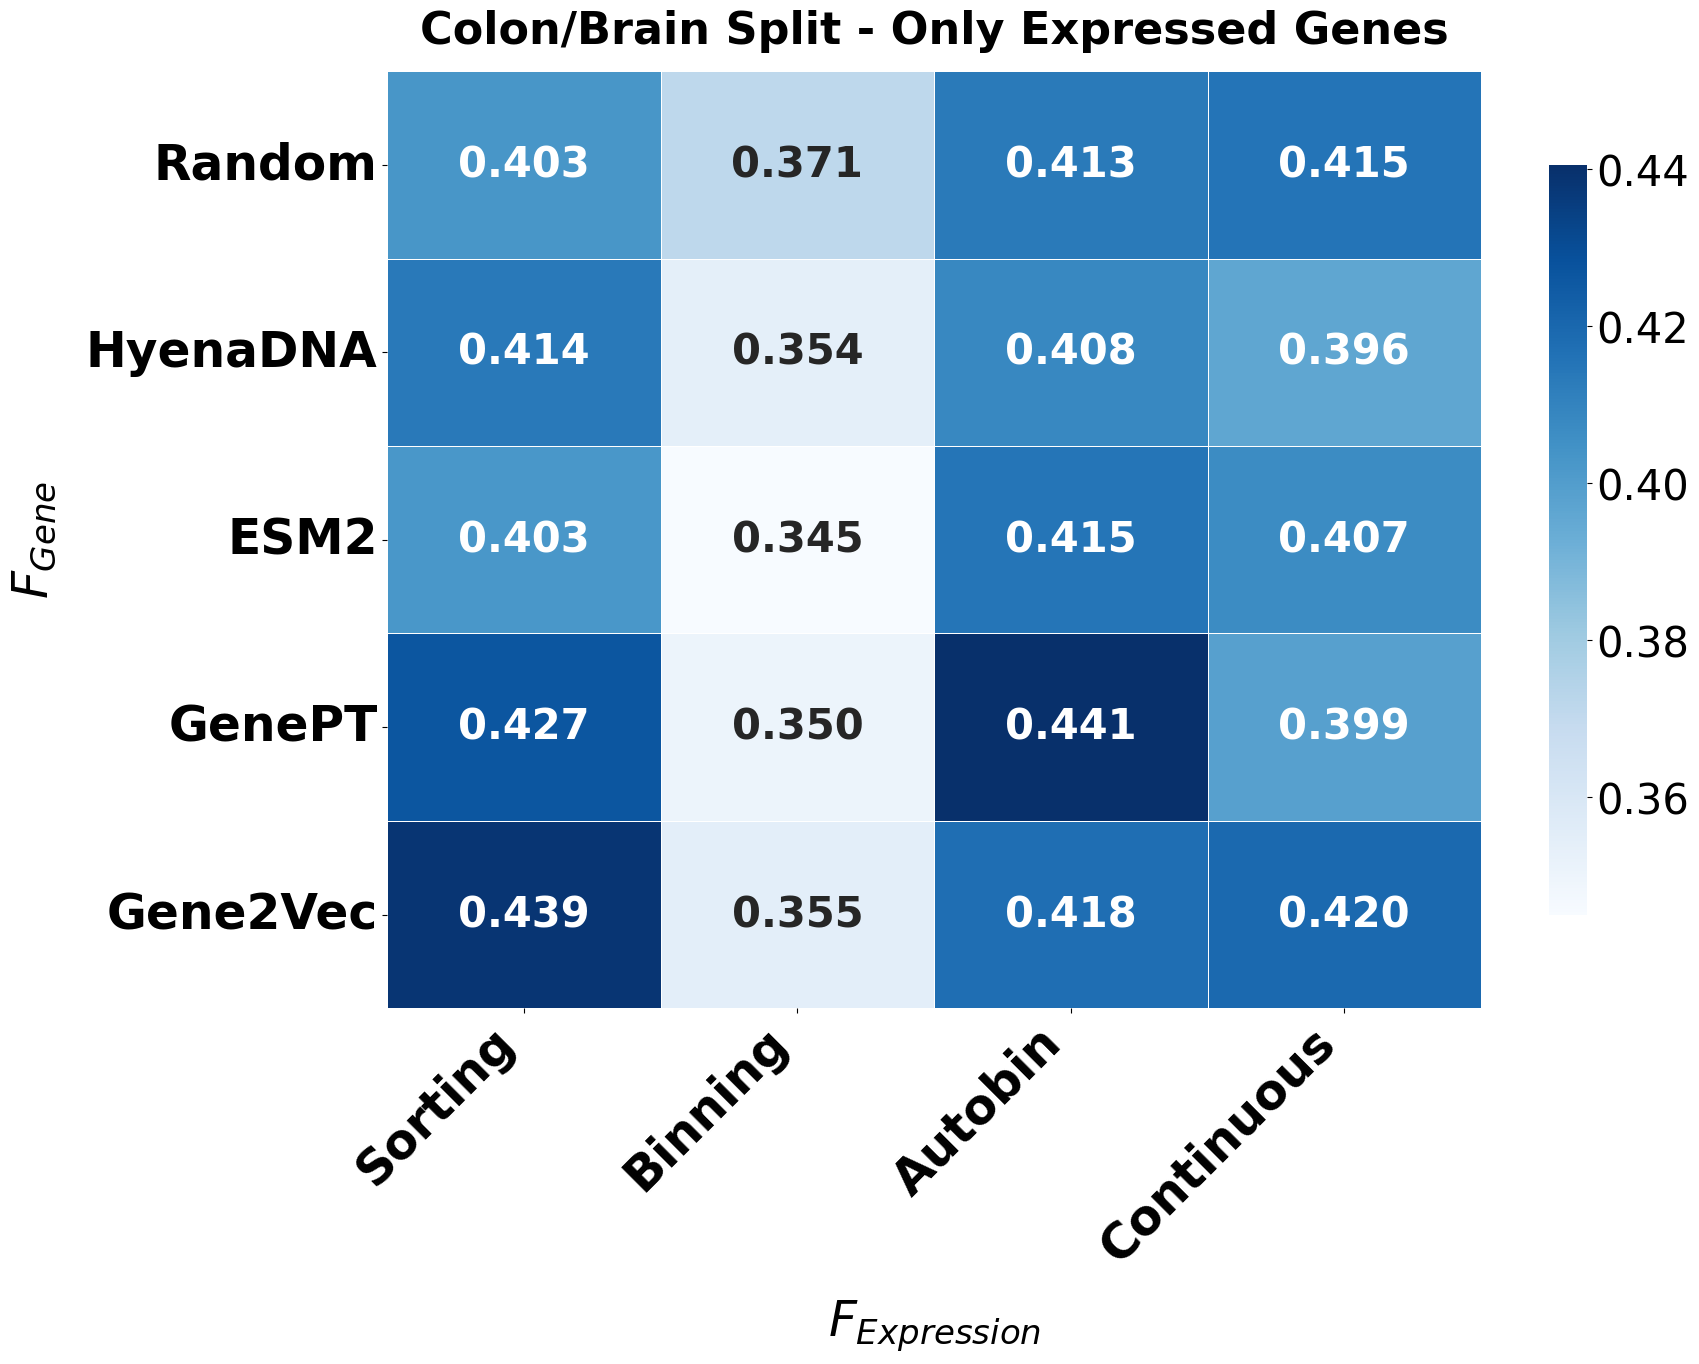

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/work/magroup/nzh/Heimdall-dev/plotting/tissue.csv")  # Replace with actual file path if needed
df = df.dropna()
df.loc[df['F_Expression'] == 'nonzero_2nn', 'F_Expression'] = 'Continuous'
df.loc[df['F_Expression'] == 'scfoundation', 'F_Expression'] = 'Autobin'
df.loc[df['F_Expression'] == 'sorting', 'F_Expression'] = 'Sorting'
df.loc[df['F_Expression'] == 'binning', 'F_Expression'] = 'Binning'

df.loc[df['F_Gene'] == 'identity', 'F_Gene'] = 'Random'
df.loc[df['F_Gene'] == 'pca_esm2', 'F_Gene'] = 'ESM2'
df.loc[df['F_Gene'] == 'pca_gene2vec', 'F_Gene'] = 'Gene2Vec'
df.loc[df['F_Gene'] == 'pca_hyenadna', 'F_Gene'] = 'HyenaDNA'
df.loc[df['F_Gene'] == 'pca_genept', 'F_Gene'] = 'GenePT'
df = df[~df.isin(['dummy']).any(axis=1)]

# Aggregate mean and std across seeds
grouped = df.groupby(['F_Gene', 'F_Expression', 'Dataset', 'All_Genes']).agg(
    mean_value=('Test Score', 'mean'),
    std_value=('Test Score', 'std')
).reset_index()

# Fixed orders
gene_order = ["Random", "HyenaDNA", "ESM2", "GenePT", "Gene2Vec"]
expression_order = ["Sorting", "Binning", "Autobin", "Continuous"]

# Conditions to subset and plot
conditions = [
    ("Split1", False),
]

def plot_heatmap_final_pretty(data, title):
    if data.empty:
        print(f"Skipping {title} because no data.")
        return

    pivot_table = data.pivot(index="F_Gene", columns="F_Expression", values="mean_value")
    available_genes = [fg for fg in gene_order if fg in pivot_table.index]
    available_expressions = [fe for fe in expression_order if fe in pivot_table.columns]
    pivot_table = pivot_table.loc[available_genes, available_expressions]

    # create a Figure+Axes so we can reference both
    fig, ax = plt.subplots(figsize=(18, 14))

    # draw heatmap into our axes, capture the returned AxesImage
    heatmap = sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        cbar=True,
        linewidths=0.5,
        linecolor='white',
        annot_kws={"size": 30, "weight": "bold", "ha": "center", "va": "center"},
        cbar_kws={"shrink": 0.8, "aspect": 20},
        ax=ax
    )

    # now enlarge the colorbar tick labels
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)       # make the numbers on the bar bigger
    # optionally also enlarge the colorbar label itself:
    # cbar.ax.yaxis.label.set_size(35)

    # rest of your styling
    ax.set_title(title, fontsize=32, pad=20, weight='bold')
    ax.set_xlabel('$F_{Expression}$', fontsize=35, labelpad=20, weight='bold')
    ax.set_ylabel('$F_{Gene}$', fontsize=35, labelpad=20, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right', weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0, weight='bold')

    plt.tight_layout(pad=2.0)
    plt.show()


# Generate plots
for dataset, all_genes in conditions:
    subset = grouped[(grouped['Dataset'] == dataset) & (grouped['All_Genes'] == all_genes)]

    if all_genes != True:
        title = f"Colon/Brain Split - Only Expressed Genes"
    else:
        title = f"scTab {dataset} With All Genes"
    plot_heatmap_final_pretty(subset, title)


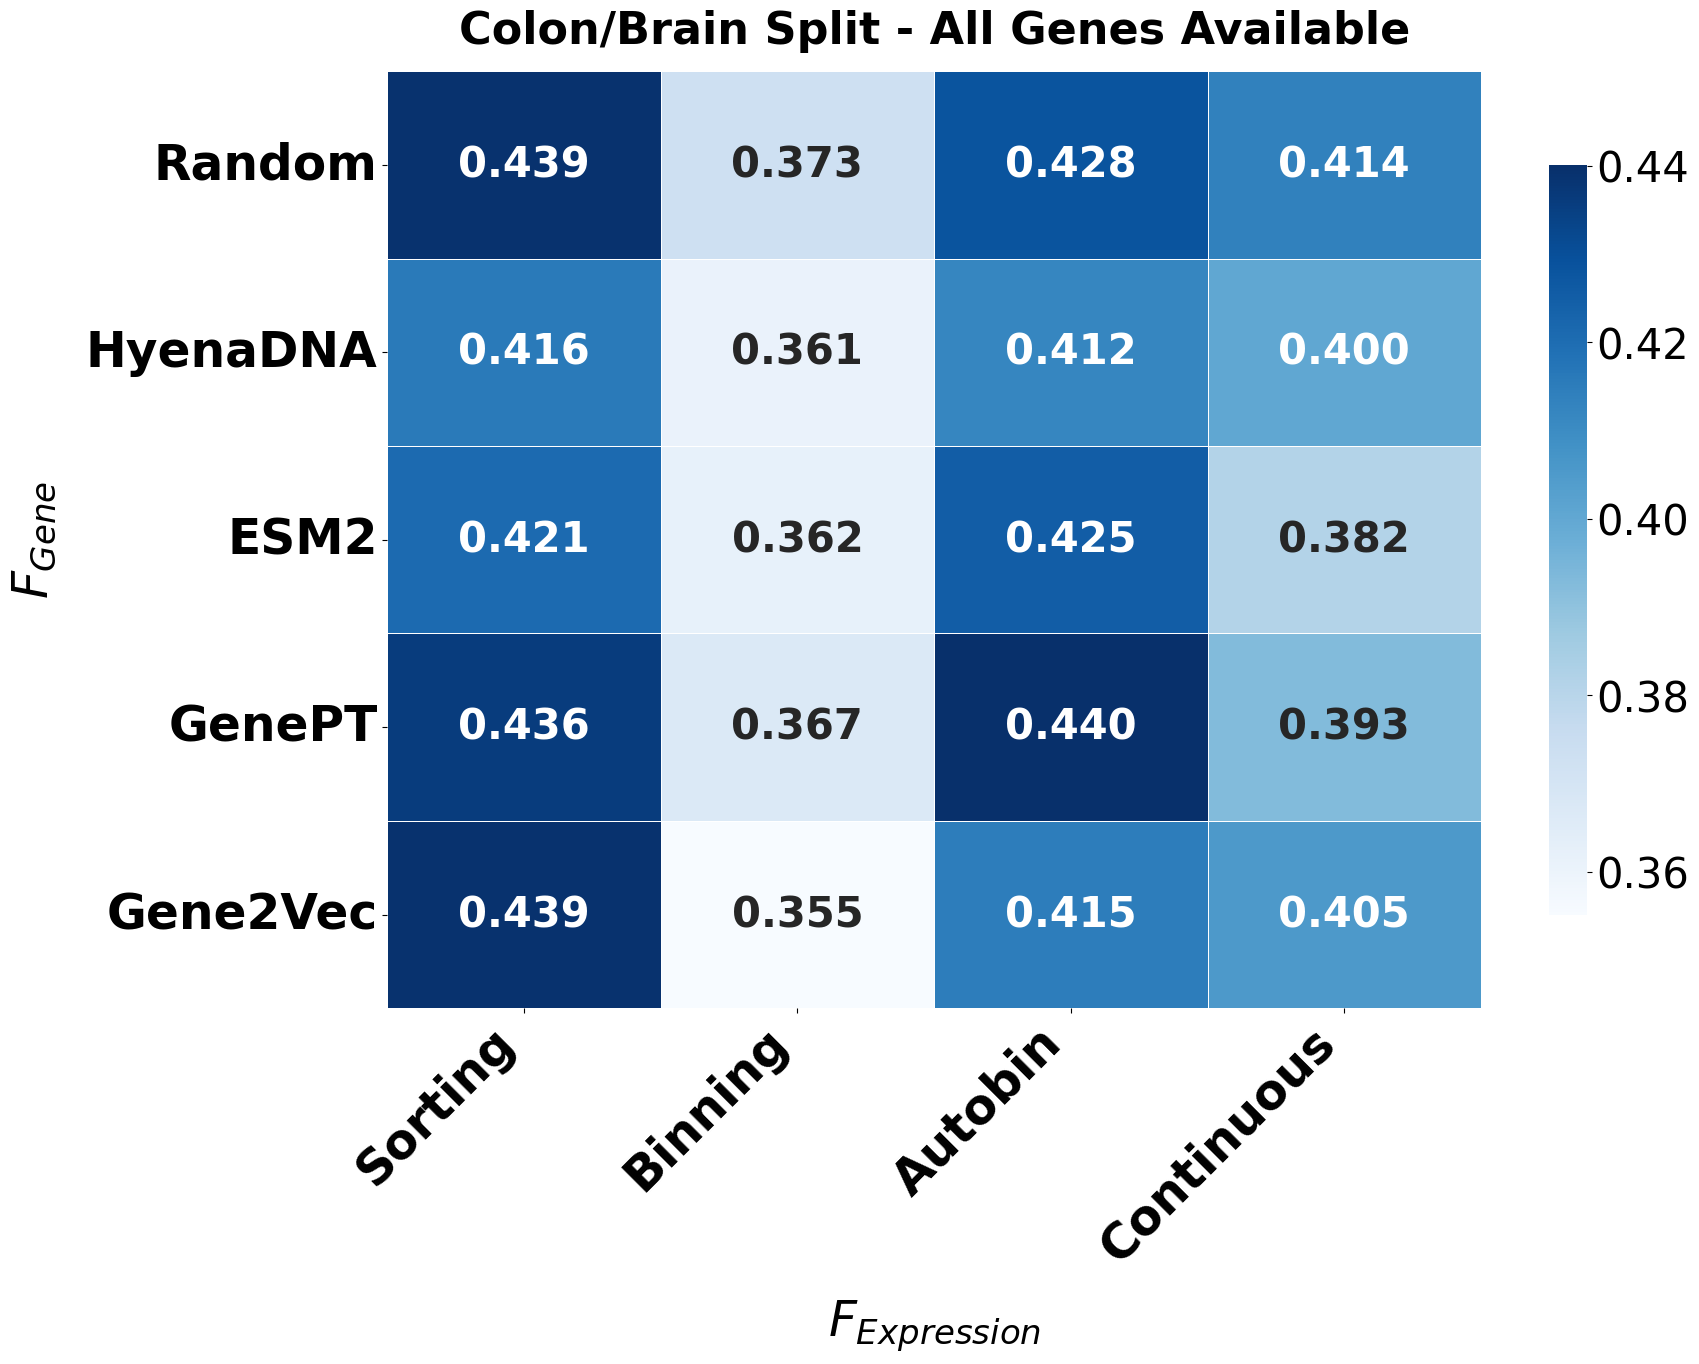

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/work/magroup/nzh/Heimdall-dev/plotting/tissue.csv")  # Replace with actual file path if needed
df = df.dropna()
df.loc[df['F_Expression'] == 'nonzero_2nn', 'F_Expression'] = 'Continuous'
df.loc[df['F_Expression'] == 'scfoundation', 'F_Expression'] = 'Autobin'
df.loc[df['F_Expression'] == 'sorting', 'F_Expression'] = 'Sorting'
df.loc[df['F_Expression'] == 'binning', 'F_Expression'] = 'Binning'

df.loc[df['F_Gene'] == 'identity', 'F_Gene'] = 'Random'
df.loc[df['F_Gene'] == 'pca_esm2', 'F_Gene'] = 'ESM2'
df.loc[df['F_Gene'] == 'pca_gene2vec', 'F_Gene'] = 'Gene2Vec'
df.loc[df['F_Gene'] == 'pca_hyenadna', 'F_Gene'] = 'HyenaDNA'
df.loc[df['F_Gene'] == 'pca_genept', 'F_Gene'] = 'GenePT'
df = df[~df.isin(['dummy']).any(axis=1)]

# Aggregate mean and std across seeds
grouped = df.groupby(['F_Gene', 'F_Expression', 'Dataset', 'All_Genes']).agg(
    mean_value=('Test Score', 'mean'),
    std_value=('Test Score', 'std')
).reset_index()

# Fixed orders
gene_order = ["Random", "HyenaDNA", "ESM2", "GenePT", "Gene2Vec"]
expression_order = ["Sorting", "Binning", "Autobin", "Continuous"]

# Conditions to subset and plot
conditions = [
    ("Split1", True),
]

def plot_heatmap_final_pretty(data, title):
    if data.empty:
        print(f"Skipping {title} because no data.")
        return

    pivot_table = data.pivot(index="F_Gene", columns="F_Expression", values="mean_value")
    available_genes = [fg for fg in gene_order if fg in pivot_table.index]
    available_expressions = [fe for fe in expression_order if fe in pivot_table.columns]
    pivot_table = pivot_table.loc[available_genes, available_expressions]

    # create a Figure+Axes so we can reference both
    fig, ax = plt.subplots(figsize=(18, 14))

    # draw heatmap into our axes, capture the returned AxesImage
    heatmap = sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        cbar=True,
        linewidths=0.5,
        linecolor='white',
        annot_kws={"size": 30, "weight": "bold", "ha": "center", "va": "center"},
        cbar_kws={"shrink": 0.8, "aspect": 20},
        ax=ax
    )

    # now enlarge the colorbar tick labels
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)       # make the numbers on the bar bigger
    # optionally also enlarge the colorbar label itself:
    # cbar.ax.yaxis.label.set_size(35)

    # rest of your styling
    ax.set_title(title, fontsize=32, pad=20, weight='bold')
    ax.set_xlabel('$F_{Expression}$', fontsize=35, labelpad=20, weight='bold')
    ax.set_ylabel('$F_{Gene}$', fontsize=35, labelpad=20, weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right', weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0, weight='bold')

    plt.tight_layout(pad=2.0)
    plt.show()


# Generate plots
for dataset, all_genes in conditions:
    subset = grouped[(grouped['Dataset'] == dataset) & (grouped['All_Genes'] == all_genes)]

    if all_genes != True:
        title = f"Colon/Brain Split - Only Expressed Genes"
    else:
        title = f"Colon/Brain Split - All Genes Available"
    plot_heatmap_final_pretty(subset, title)
